In [141]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [142]:
# Loading Dataset
df = pd.read_csv("sales_data.csv")
df

,Product ID,Store ID,Date,Sales,Promotion,Holiday,Store Location
0,1,101,2022-01-01,1500,1,1.0,New York
1,2,102,2022-01-01,2000,1,1.0,Los Angeles
2,3,103,2022-01-01,1200,0,1.0,Chicago
3,4,104,2022-01-01,1800,0,1.0,Houston
4,5,101,2022-01-02,1600,0,0.0,New York
...,...,...,...,...,...,...,...
295,296,102,2022-03-15,2250,1,0.0,Los Angeles
296,297,103,2022-03-15,1100,0,0.0,Chicago
297,298,104,2022-03-15,1950,0,0.0,Houston
298,299,101,2022-03-16,1600,0,0.0,New York


DATA Pre-Processing and EDA (Exploratory Data Analysis)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      300 non-null    int64  
 1   Store ID        300 non-null    int64  
 2   Date            300 non-null    object 
 3   Sales           300 non-null    int64  
 4   Promotion       300 non-null    object 
 5   Holiday         299 non-null    float64
 6   Store Location  299 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 16.5+ KB


In [145]:
df.shape

(300, 7)

In [146]:
# assuming it a boolean value feature
df['Holiday'].value_counts()

0.0    295
1.0      4
Name: Holiday, dtype: int64

In [147]:
# One of the aspects of handling missing values
df['Holiday'].fillna(0,inplace = True)

In [148]:
df['Store Location'].value_counts()

Los Angeles    76
New York       75
Chicago        74
Houston        74
Name: Store Location, dtype: int64

In [149]:
df['Product ID'].duplicated().value_counts()

False    300
Name: Product ID, dtype: int64

In [150]:
# assuming it a boolean value feature
df['Promotion'].value_counts()

0          214
1           85
Houston      1
Name: Promotion, dtype: int64

In [151]:
df[df['Promotion'] == 'Houston']

,Product ID,Store ID,Date,Sales,Promotion,Holiday,Store Location
35,36,104,2022-01-09,1850,Houston,0.0,NaN


In [152]:
# Replacing one anomally
df['Promotion'].replace('Houston',"1")

0      1
1      1
2      0
3      0
4      0
      ..
295    1
296    0
297    0
298    0
299    0
Name: Promotion, Length: 300, dtype: object

In [162]:
pd.to_datetime(df['Date'])
df['Date']= pd.to_datetime(df['Date'])

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Product ID      300 non-null    int64         
 1   Store ID        300 non-null    int64         
 2   Date            300 non-null    datetime64[ns]
 3   Sales           300 non-null    int64         
 4   Promotion       300 non-null    object        
 5   Holiday         300 non-null    float64       
 6   Store Location  299 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 16.5+ KB


In [176]:
# Importing libraries to train the model and applying linear regression through sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [177]:
df

,Product ID,Store ID,Date,Sales,Promotion,Holiday,Store Location
0,0,0,0,7,1,1,3
1,1,1,0,15,1,1,2
2,2,2,0,2,0,1,0
3,3,3,0,11,0,1,1
4,4,0,1,9,0,0,3
...,...,...,...,...,...,...,...
295,295,1,73,20,1,0,2
296,296,2,73,0,0,0,0
297,297,3,73,14,0,0,1
298,298,0,74,9,0,0,3


In [178]:
df.columns

Index(['Product ID', 'Store ID', 'Date', 'Sales', 'Promotion', 'Holiday',
       'Store Location'],
      dtype='object')

In [179]:
# features other than sales column (bcz it is needed to be predicted)
df.columns[df.columns != 'Sales']

Index(['Product ID', 'Store ID', 'Date', 'Promotion', 'Holiday',
       'Store Location'],
      dtype='object')

In [182]:
# labelencoder converts object to number (To deal with object and datetime values)
le = preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])
df = df.fillna(0)  


<Axes: >

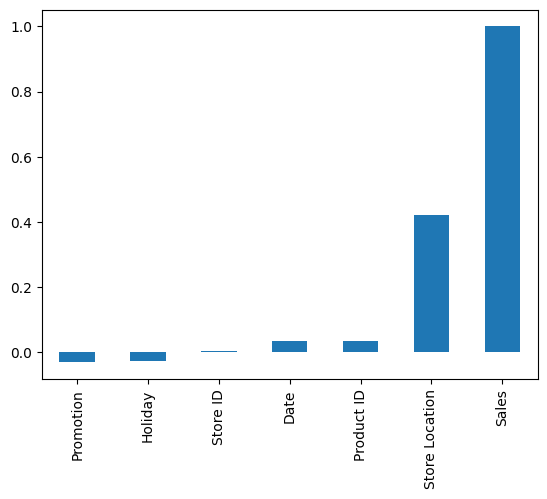

In [184]:
# Plottin correlation of values with the feature to be predicted(SALES)
df.corrwith(df['Sales']).sort_values(ascending=True).plot(kind='bar')


In [186]:
X = df[df.columns[df.columns != 'Sales']]
y = df['Sales']

# Splitting the training and test data with 80 to 20 percentage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Applying the linear regression model
model1 = LinearRegression()

model1.fit(X_train,y_train)

# Coefficients/Slopes of all of the independent variables (columns other than sales)
model1.coef_

array([-0.94178748,  5.47969525,  3.80986009,  1.65762271, -0.56091802,
        5.89277149])

In [ ]:
# 240 by 60 row split for test and training data
y_test.shape

(60,)

In [187]:
# Intercept of the linear regression model 
model1.intercept_

-6.903357372022459

In [188]:
y_test.head()

77     18
239    18
6       0
174    16
144     9
Name: Sales, dtype: int64

In [189]:
X_test.head()

,Product ID,Store ID,Date,Promotion,Holiday,Store Location
77,77,1,19,1,0,2
239,239,1,59,1,0,2
6,6,2,1,0,0,0
174,174,1,43,0,0,2
144,144,0,36,0,0,3


In [190]:
# Predicting the sales values using pre-trained linear regression model
y_pred = model1.predict(X_test)
y_pred

array([11.8892095 , 11.71404172,  2.21516835, 10.31484361, 12.31252355,
        2.89853122,  3.40672632, 14.09799371, 13.37192065, 13.23946306,
        3.71002463,  4.64157429, 15.15551038,  9.50551373, 13.5811445 ,
       13.70927503, 11.41560978,  2.81094733, 11.24476906,  4.38098616,
       12.0422194 , 12.90210868, 13.45517748,  9.76177481, 12.77397814,
       11.8000014 ,  5.23735328, 11.88704597, 10.27213343, 12.13951931,
        3.49647373, 14.01040982, 13.62385468,  2.9412414 , 12.14168283,
        4.93838202, 11.96867859,  4.59670058, 11.88325823, 10.40026397,
        4.97892867, 11.67133154, 10.70139876,  3.24021265,  2.98178805,
       13.92715299, 11.58428697,  2.64227014, 14.05528353, 11.71458104,
       10.98850799,  4.81241501, 14.34618049, 11.07392835, 10.22725973,
       15.24309426, 10.05858254, 14.51702121, 11.3728996 , 12.26764985])

In [191]:
# Analysing difference of actual and predicted data
print(y_test.head(),y_pred)

77     18
239    18
6       0
174    16
144     9
Name: Sales, dtype: int64 [11.8892095  11.71404172  2.21516835 10.31484361 12.31252355  2.89853122
  3.40672632 14.09799371 13.37192065 13.23946306  3.71002463  4.64157429
 15.15551038  9.50551373 13.5811445  13.70927503 11.41560978  2.81094733
 11.24476906  4.38098616 12.0422194  12.90210868 13.45517748  9.76177481
 12.77397814 11.8000014   5.23735328 11.88704597 10.27213343 12.13951931
  3.49647373 14.01040982 13.62385468  2.9412414  12.14168283  4.93838202
 11.96867859  4.59670058 11.88325823 10.40026397  4.97892867 11.67133154
 10.70139876  3.24021265  2.98178805 13.92715299 11.58428697  2.64227014
 14.05528353 11.71458104 10.98850799  4.81241501 14.34618049 11.07392835
 10.22725973 15.24309426 10.05858254 14.51702121 11.3728996  12.26764985]


Analyzing results using MSE and R-square error methods

In [ ]:
# lesser the MSE, better the results or best regression line fit
# MSE closer to zero
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

35.186555946481455

In [ ]:
# the larger the R2, the better the regression model fits your observation
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.01296907019594451